# Census Health Insurance Estimates

In [2]:
# Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

## Insurance Data by Age Category

In [3]:
# Run a request to endpoint and convert result to json
response = requests.get("https://api.census.gov/data/timeseries/healthins/sahie?get=NIC_PT,NUI_PT,AGE_DESC,AGECAT,NAME&for=county:*&in=state:37&time=2019").json()

# Convert result to a dataframe
insurance_by_age = pd.DataFrame(response)

# Rename columns
insurance_by_age = insurance_by_age.rename(columns={0: "Insured Population",
                                                    1: "Uninsured Population",
                                                    2: "Age Category",
                                                    4: "County",
                                                    5: "Year"
                                                    })

# Drop unused columns and rows, Reset Index
insurance_by_age = insurance_by_age.drop(index=0, axis=0, )
insurance_by_age = insurance_by_age.drop(labels=[3, 6, 7], axis=1)
insurance_by_age = insurance_by_age.reset_index(drop=True)

insurance_by_age.head(20)

,Insured Population,Uninsured Population,Age Category,County,Year
0,114466,19822,Under 65 years,"Alamance County, NC",2019
1,80092,17813,18 to 64 years,"Alamance County, NC",2019
2,46656,7326,40 to 64 years,"Alamance County, NC",2019
3,29596,3725,50 to 64 years,"Alamance County, NC",2019
4,36157,2237,Under 19 years,"Alamance County, NC",2019
5,75550,16773,21 to 64 years,"Alamance County, NC",2019
6,24561,3867,Under 65 years,"Alexander County, NC",2019
7,17729,3424,18 to 64 years,"Alexander County, NC",2019
8,10711,1708,40 to 64 years,"Alexander County, NC",2019
9,7009,897,50 to 64 years,"Alexander County, NC",2019


In [4]:
# Get a list of Counties in NC
county_list = insurance_by_age["County"].unique()

# Store age categories in a list
age_category_list = ["Total","Under 18", "18 to 40 years", "40 to 50 years", "50 to 64 years"]

# Create a empty dataframe to store clean data
clean_insurance_by_age = pd.DataFrame(columns=["Number Insured", "Number Uninsured", "Age Category", "County"])

# Change first two columns data type to integer
insurance_by_age["Insured Population"] = insurance_by_age["Insured Population"].astype(int)
insurance_by_age["Uninsured Population"] = insurance_by_age["Uninsured Population"].astype(int)


In [5]:
# Loop through county list
for county in county_list:
    # Create a dataframe for county data
    county_df = insurance_by_age.loc[insurance_by_age["County"] == county]

    # Calculate insured population
    insured_total = county_df.iloc[0, 0]
    insured_18to40 = county_df.iloc[1, 0] - county_df.iloc[2, 0]
    insured_40to50 = county_df.iloc[2, 0] - county_df.iloc[3, 0]
    insured_under18 = county_df.iloc[4,0] - (county_df.iloc[1,0] - (county_df.iloc[0, 0] - county_df.iloc[4,0]))
    insured_50to64 = county_df.iloc[3,0]

    # Calculate uninsured population
    Uninsured_total = county_df.iloc[0, 1]
    Uninsured_18to40 = county_df.iloc[1, 1] - county_df.iloc[2, 1]
    Uninsured_40to50 = county_df.iloc[2, 1] - county_df.iloc[3, 1]
    Uninsured_under18 = county_df.iloc[4,1] - (county_df.iloc[1,1] - (county_df.iloc[0, 1] - county_df.iloc[4,1]))
    Uninsured_50to64 = county_df.iloc[3,1]
    
    # Store output data in a dataframe
    df = pd.DataFrame({"Number Insured" : [insured_total, insured_under18, insured_18to40, insured_40to50, insured_50to64],
                    "Number Uninsured": [Uninsured_total, Uninsured_under18, Uninsured_18to40, Uninsured_40to50, Uninsured_50to64],
                    "Age Category" : age_category_list,
                    "County" : [county, county, county, county,county]
                    })
    
    # Concatenate output data frame to clean dataframe
    clean_insurance_by_age = pd.concat([clean_insurance_by_age, df], ignore_index=True)

# Change first two columns data type to integer
clean_insurance_by_age["Number Insured"] = clean_insurance_by_age["Number Insured"].astype(int)
clean_insurance_by_age["Number Uninsured"] = clean_insurance_by_age["Number Uninsured"].astype(int)

# Calculate Percentages and add it to dataframe
clean_insurance_by_age["Percentage Insured"] = (clean_insurance_by_age["Number Insured"] * 100/ (clean_insurance_by_age["Number Insured"] + clean_insurance_by_age["Number Uninsured"]))
clean_insurance_by_age["Percentage Uninsured"] = (clean_insurance_by_age["Number Uninsured"] * 100/ (clean_insurance_by_age["Number Insured"] + clean_insurance_by_age["Number Uninsured"]))
clean_insurance_by_age


,Number Insured,Number Uninsured,Age Category,County,Percentage Insured,Percentage Uninsured
0,114466,19822,Total,"Alamance County, NC",85.239187,14.760813
1,34374,2009,Under 18,"Alamance County, NC",94.478190,5.521810
2,33436,10487,18 to 40 years,"Alamance County, NC",76.124126,23.875874
3,17060,3601,40 to 50 years,"Alamance County, NC",82.571028,17.428972
4,29596,3725,50 to 64 years,"Alamance County, NC",88.820864,11.179136
...,...,...,...,...,...,...
495,11089,2069,Total,"Yancey County, NC",84.275726,15.724274
496,2969,231,Under 18,"Yancey County, NC",92.781250,7.218750
497,3110,902,18 to 40 years,"Yancey County, NC",77.517448,22.482552
498,1696,419,40 to 50 years,"Yancey County, NC",80.189125,19.810875


## Insurance Data by Income Category

In [6]:
# Run a request to endpoint and convert result to json
response = requests.get("https://api.census.gov/data/timeseries/healthins/sahie?get=NIC_PT,NUI_PT,IPR_DESC,IPRCAT,NAME&for=county:*&in=state:37&time=2019").json()

# Convert result to a dataframe
insurance_by_income = pd.DataFrame(response)

# Rename columns
insurance_by_income = insurance_by_income.rename(columns={0: "Insured Population",
                                                    1: "Uninsured Population",
                                                    2: "Income Category",
                                                    4: "County",
                                                    5: "Year"
                                                    })

# Drop unused columns and rows, Reset Index
insurance_by_income = insurance_by_income.drop(index=0, axis=0, )
insurance_by_income = insurance_by_income.drop(labels=[3, 6, 7], axis=1)
insurance_by_income = insurance_by_income.reset_index(drop=True)

insurance_by_income.head(20)

,Insured Population,Uninsured Population,Income Category,County,Year
0,114466,19822,All Incomes,"Alamance County, NC",2019
1,37624,11050,<= 200% of Poverty,"Alamance County, NC",2019
2,47248,13355,<= 250% of Poverty,"Alamance County, NC",2019
3,24827,7531,<= 138% of Poverty,"Alamance County, NC",2019
4,74273,17315,<= 400% of Poverty,"Alamance County, NC",2019
5,49446,9784,138% to 400% of Poverty,"Alamance County, NC",2019
6,24561,3867,All Incomes,"Alexander County, NC",2019
7,7849,2021,<= 200% of Poverty,"Alexander County, NC",2019
8,10196,2510,<= 250% of Poverty,"Alexander County, NC",2019
9,4796,1284,<= 138% of Poverty,"Alexander County, NC",2019


In [7]:
# Store income categories in a list
income_category_list = ["Over 400% of Poverty","250% to 400% of Poverty", "200% to 250% of Poverty", "138% to 200% of Poverty", "Under 138% of Poverty"]

# Create a empty dataframe to store clean data
clean_insurance_by_income = pd.DataFrame(columns=["Number Insured", "Number Uninsured", "Income Category", "County"])

# Change first two columns data type to integer
insurance_by_income["Insured Population"] = insurance_by_income["Insured Population"].astype(int)
insurance_by_income["Uninsured Population"] = insurance_by_income["Uninsured Population"].astype(int)

In [8]:
# Loop through county list
for county in county_list:

    # Create a dataframe for county data
    county_df = insurance_by_income.loc[insurance_by_income["County"] == county]


    # Calculate insured population
    insured_over400 = county_df.iloc[0, 0] - county_df.iloc[4, 0]
    insured_250to400 = county_df.iloc[4, 0] - county_df.iloc[2, 0]
    insured_200to250 = county_df.iloc[2, 0] - county_df.iloc[1, 0]
    insured_138to200 = county_df.iloc[1, 0] - county_df.iloc[3, 0]
    insured_under138  = county_df.iloc[3, 0]

    # Calculate uninsured population
    uninsured_over400 = county_df.iloc[0, 1] - county_df.iloc[4, 1]
    uninsured_250to400 = county_df.iloc[4, 1] - county_df.iloc[2, 1]
    uninsured_200to250 = county_df.iloc[2, 1] - county_df.iloc[1, 1]
    uninsured_138to200 = county_df.iloc[1, 1] - county_df.iloc[3, 1]
    uninsured_under138  = county_df.iloc[3, 1]

    # Store output data in a dataframe
    df = pd.DataFrame({"Number Insured" : [insured_over400, insured_250to400, insured_200to250, insured_138to200, insured_under138],
                        "Number Uninsured": [uninsured_over400, uninsured_250to400, uninsured_200to250, uninsured_138to200, uninsured_under138],
                        "Income Category" : income_category_list,
                        "County" : [county, county, county, county,county]
                        })

    # Concatenate output data frame to clean dataframe
    clean_insurance_by_income = pd.concat([clean_insurance_by_income, df], ignore_index=True)

# Change first two columns data type to integer
clean_insurance_by_income["Number Insured"] = clean_insurance_by_income["Number Insured"].astype(int)
clean_insurance_by_income["Number Uninsured"] = clean_insurance_by_income["Number Uninsured"].astype(int)

# Calculate Percentages and add it to dataframe
clean_insurance_by_income["Percentage Insured"] = (clean_insurance_by_income["Number Insured"] * 100/ (clean_insurance_by_income["Number Insured"] + clean_insurance_by_income["Number Uninsured"]))
clean_insurance_by_income["Percentage Uninsured"] = (clean_insurance_by_income["Number Uninsured"] * 100/ (clean_insurance_by_income["Number Insured"] + clean_insurance_by_income["Number Uninsured"]))
clean_insurance_by_income

# Save dataframe to csv file
clean_insurance_by_income.to_csv("clean_insurance_by_income.csv", index=False)


In [9]:
# Create an emtpy list to fill with percentage insured data (for plotting)
percenteges_insured = []

# Calculate the IQR and quantitavely determine if there are any potential outliers
for category in income_category_list:
    
    # Locate the rows for each income category and get the percentage insured
    percentage = clean_insurance_by_income.loc[clean_insurance_by_income["Income Category"] == category, "Percentage Insured"]

    # add subset
    percenteges_insured.append(percentage)

    # Determine outliers using upper and lower bounds
    quartiles = percentage.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq= quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = percentage[(percentage < lower_bound) | (percentage > upper_bound)]

    print(f"{category}'s potential {outliers}")


Over 400% of Poverty's potential 185    88.239816
195    89.349112
385    87.489556
430    84.823529
Name: Percentage Insured, dtype: float64
250% to 400% of Poverty's potential 151    82.793585
386    80.189093
406    82.531146
431    78.733572
Name: Percentage Insured, dtype: float64
200% to 250% of Poverty's potential 152    75.079940
332    87.778861
407    76.111003
432    75.170843
Name: Percentage Insured, dtype: float64
138% to 200% of Poverty's potential Series([], Name: Percentage Insured, dtype: float64)
Under 138% of Poverty's potential Series([], Name: Percentage Insured, dtype: float64)


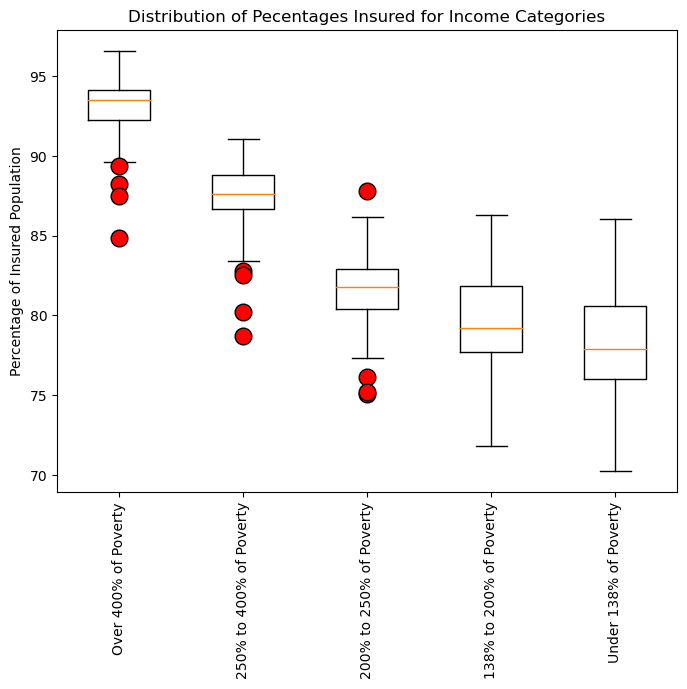

In [10]:
# Generate a box plot that shows the distrubution of percentages for each income category

data = [percenteges_insured[0].array, percenteges_insured[1].array, percenteges_insured[2].array, percenteges_insured[3].array, percenteges_insured[4].array]
fig, axs = plt.subplots(figsize = (8,6))
axs.boxplot(data,flierprops= dict(marker='o', markersize=12, markerfacecolor='red', markeredgecolor='black'))
axs.set_xticklabels(income_category_list, rotation=90 )
axs.set_ylabel("Percentage of Insured Population")
axs.set_title("Distribution of Pecentages Insured for Income Categories")
plt.show()


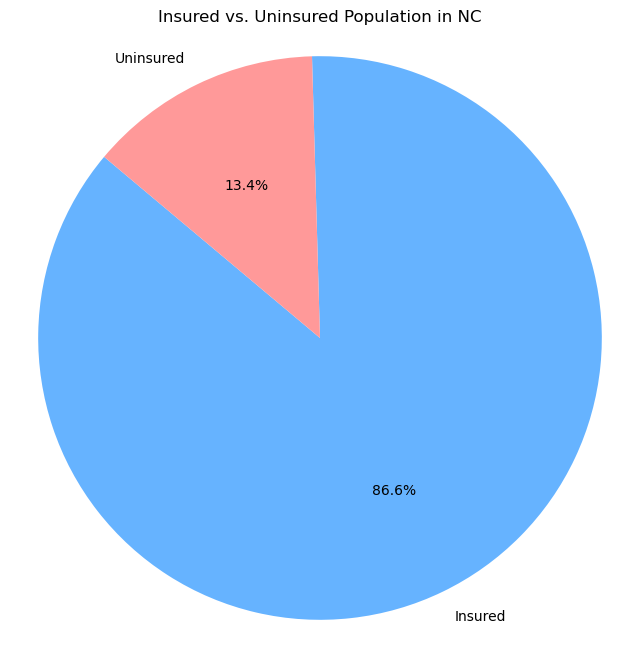

In [11]:
# Calculate the total insured and uninsured populations for the entire state
total_insured_population = clean_insurance_by_age["Number Insured"].sum()
total_uninsured_population = clean_insurance_by_age["Number Uninsured"].sum()

# Pie chart data
labels = ['Insured', 'Uninsured']
sizes = [total_insured_population, total_uninsured_population]
colors = ['#66b3ff', '#ff9999']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Insured vs. Uninsured Population in NC')
plt.show()



In [12]:
# Total insured vs uninsured
total_text = f'Total Insured: {total_insured_population}\nTotal Uninsured: {total_uninsured_population}'

print(total_text)

Total Insured: 14683466
Total Uninsured: 2279246


/var/folders/k6/d0216ry509x6j4ccbxwt_cmc0000gn/T/ipykernel_37754/356678122.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = clean_insurance_by_age.groupby("County").sum()


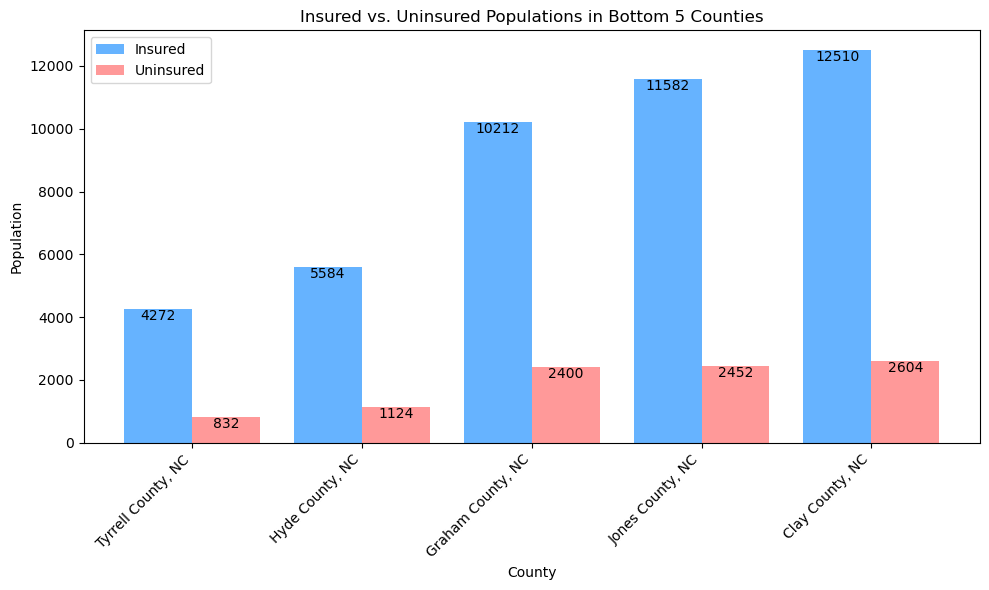

In [13]:
# Calculate the total population for each county
clean_insurance_by_age["Total Population"] = clean_insurance_by_age["Number Insured"] + clean_insurance_by_age["Number Uninsured"]

# Get County populations
grouped_data = clean_insurance_by_age.groupby("County").sum()
sorted_data = grouped_data.sort_values(by="Total Population")

# Choose bottom 5 counties
bottom_counties = sorted_data.head(5)

# Get data for the bottom 5 counties
counties = bottom_counties.index
insured_population = bottom_counties["Number Insured"]
uninsured_population = bottom_counties["Number Uninsured"]
total_population = bottom_counties["Total Population"]

# Set the width of the bars
bar_width = 0.40

# Position of the bars on the x-axis
r1 = np.arange(len(counties))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, insured_population, width=bar_width, label="Insured", color="#66b3ff")
plt.bar(r2, uninsured_population, width=bar_width, label="Uninsured", color="#ff9999")

# Add exact population counts on top of each bar
for i, v in enumerate(insured_population):
    plt.text(i, v, str(v), ha='center', va='top', fontsize=10)

for i, v in enumerate(uninsured_population):
    plt.text(i + bar_width, v, str(v), ha='center', va='top', fontsize=10)


# Titles and legend
plt.xlabel('County')
plt.ylabel('Population')
plt.title('Insured vs. Uninsured Populations in Bottom 5 Counties')
plt.xticks([r + bar_width/2 for r in range(len(counties))], counties, rotation=45, ha='right')
plt.legend()

# Display
plt.tight_layout()
plt.show()

/var/folders/k6/d0216ry509x6j4ccbxwt_cmc0000gn/T/ipykernel_37754/215992536.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = clean_insurance_by_age.groupby("County").sum()


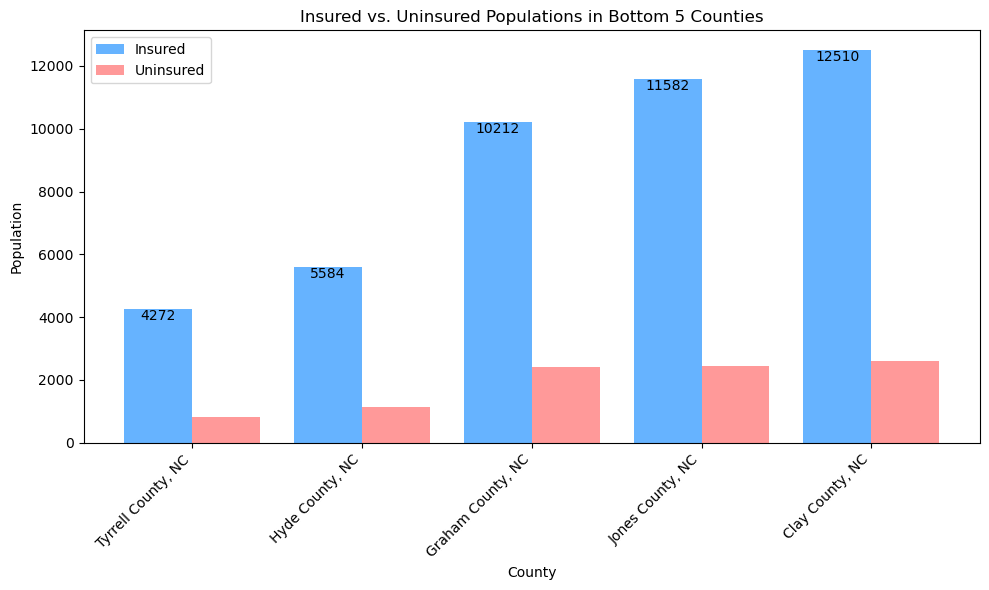

In [14]:
# Get County populations
grouped_data = clean_insurance_by_age.groupby("County").sum()
sorted_data = grouped_data.sort_values(by="Total Population")

# Choose bottom 5 counties
bottom_counties = sorted_data.head(5)

# Get data for the bottom 5 counties
counties = bottom_counties.index
insured_population = bottom_counties["Number Insured"]
uninsured_population = bottom_counties["Number Uninsured"]
total_population = insured_population + uninsured_population

# Set the width of the bars
bar_width = 0.40

# Position of the bars on the x-axis
r1 = np.arange(len(counties))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, insured_population, width=bar_width, label="Insured", color="#66b3ff")
plt.bar(r2, uninsured_population, width=bar_width, label="Uninsured", color="#ff9999")

# Add exact population counts on the top of each bar
for i, v in enumerate(insured_population):
    plt.text(i, v, str(v), ha='center', va='top', fontsize=10)



# Titles and legend
plt.xlabel('County')
plt.ylabel('Population')
plt.title('Insured vs. Uninsured Populations in Bottom 5 Counties')
plt.xticks([r + bar_width/2 for r in range(len(counties))], counties, rotation=45, ha='right')
plt.legend()

# Display
plt.tight_layout()
plt.show()

/var/folders/k6/d0216ry509x6j4ccbxwt_cmc0000gn/T/ipykernel_37754/4043737617.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_data = clean_insurance_by_income.groupby("Income Category").sum()


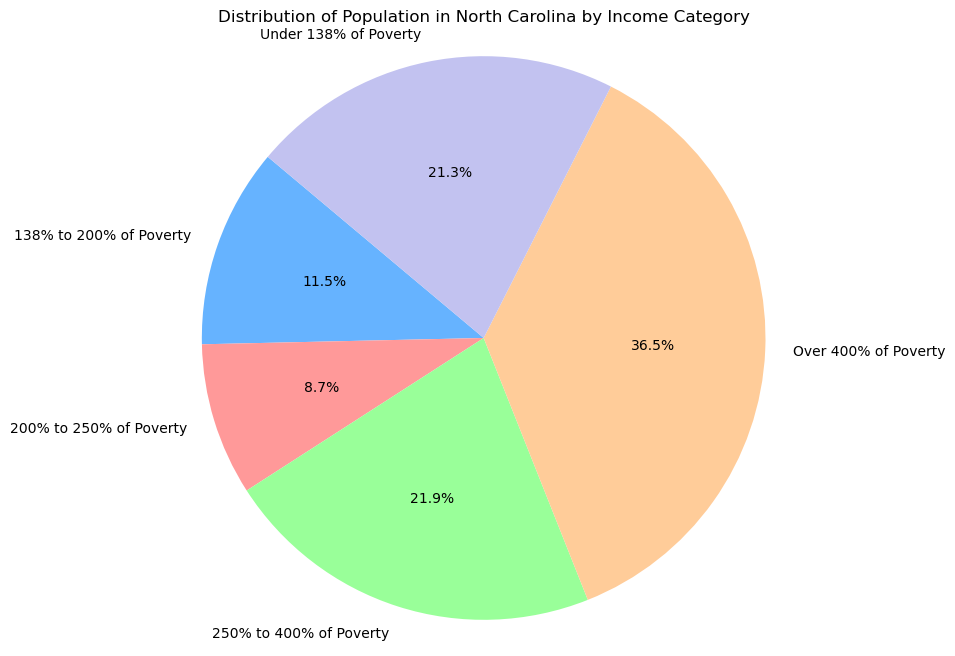

In [15]:
# Group the data by income category and sum the insured and uninsured populations for the entire state
state_data = clean_insurance_by_income.groupby("Income Category").sum()

# Data for the entire state
income_categories = state_data.index
population_count = state_data["Number Insured"] + state_data["Number Uninsured"]

# Colors for the pie chart
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(population_count, labels=income_categories, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Population in North Carolina by Income Category')

# Display the pie chart
plt.axis('equal')
plt.show()


/var/folders/k6/d0216ry509x6j4ccbxwt_cmc0000gn/T/ipykernel_37754/3280478995.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_data = clean_insurance_by_income.groupby("Income Category").sum()
/var/folders/k6/d0216ry509x6j4ccbxwt_cmc0000gn/T/ipykernel_37754/3280478995.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,}'.format(int(x)) for x in plt.gca().get_yticks()])


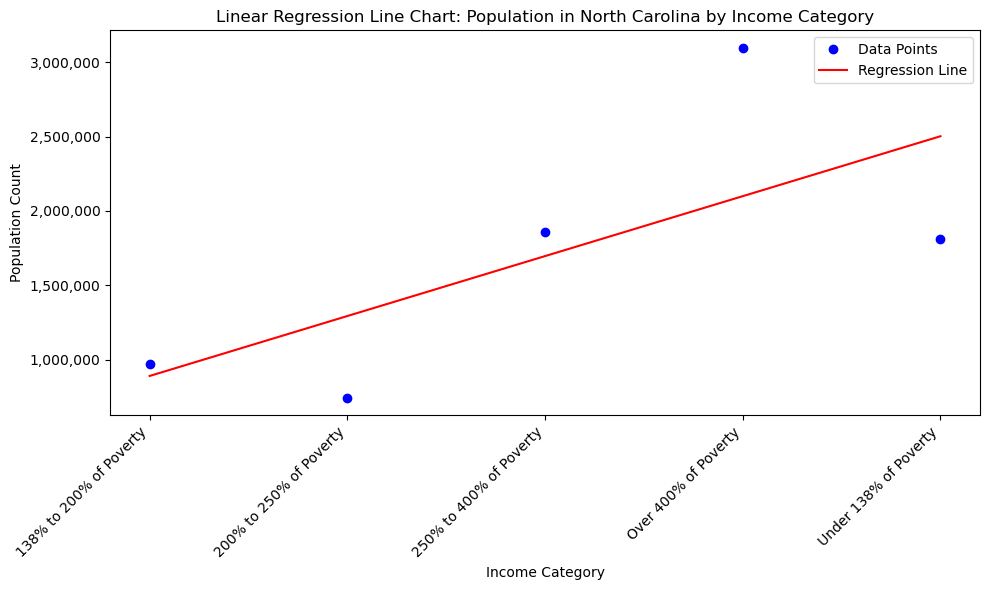

In [16]:

# Group the data by income category and sum the insured and uninsured populations for the entire state
state_data = clean_insurance_by_income.groupby("Income Category").sum()

# Data for the entire state
income_categories = state_data.index
population_count = state_data["Number Insured"] + state_data["Number Uninsured"]

# Create a linear regression for the data
coefficients = np.polyfit(np.arange(len(income_categories)), population_count, deg=1)
regression_line = np.poly1d(coefficients)

# Create the linear regression line chart
plt.figure(figsize=(10, 6))
plt.plot(income_categories, population_count, 'bo', label='Data Points')
plt.plot(income_categories, regression_line(np.arange(len(income_categories))), 'r-', label='Regression Line')

# Add labels and title
plt.xlabel('Income Category')
plt.ylabel('Population Count')
plt.title('Linear Regression Line Chart: Population in North Carolina by Income Category')

# Format y-axis labels as integers
plt.gca().set_yticklabels(['{:,}'.format(int(x)) for x in plt.gca().get_yticks()])

# Add legend
plt.legend()

# Display the chart
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
